In [257]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
%matplotlib inline

In [258]:
import cufflinks as cf;
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot; 

In [259]:
init_notebook_mode(connected = True);

In [260]:
import chart_studio.plotly as py;

In [261]:
cf.go_offline();

In [262]:
fatal_enc = pd.read_csv('fatal_encounters_dot_org.csv');

In [263]:
death_arrests = pd.read_csv('deaths_arrests.csv');

In [264]:
death_police = pd.read_csv('police_deaths_538.csv');

In [265]:
death_pol_killings = pd.read_csv('police_killings_MPV.csv');

C:\Users\Shahbaz\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning:

Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.



In [266]:
wash_post_shoot_stats = pd.read_csv('shootings_wash_post.csv');

In [267]:
fatal_enc.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,01/01/2000,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,01/01/2000,600 W Cherry Ln,...,A motorcycle was allegedly being driven errati...,Unreported,Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [268]:
death_arrests.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3


In [269]:
death_police.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [270]:
death_pol_killings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Name withheld by police,Unknown,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,Unknown,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name withheld by police,61,Male,Unknown race,NaN,05/09/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Name withheld by police,22,Male,Unknown race,NaN,05/09/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Steven D. Smith,33,Male,Unknown race,NaN,04/09/2020,200 N. State Street,Syracuse,NY,13203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
wash_post_shoot_stats.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Exploratory Data Analysis

### For dataset 1: Police deaths. Dataframe_name: death_police 

In [272]:
death_police.columns

Index(['person', 'dept', 'eow', 'cause', 'cause_short', 'date', 'year',
       'canine', 'dept_name', 'state'],
      dtype='object')

In [273]:
death_police.describe()

,year
count,22800.000000
mean,1951.751272
std,38.233234
min,1791.000000
25%,1924.000000
50%,1952.000000
75%,1983.000000
max,2016.000000


In [274]:
death_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause        22800 non-null  object
 4   cause_short  22800 non-null  object
 5   date         22800 non-null  object
 6   year         22800 non-null  int64 
 7   canine       22800 non-null  bool  
 8   dept_name    22800 non-null  object
 9   state        22800 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ MB


In [275]:
death_police.isnull().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

<AxesSubplot:>

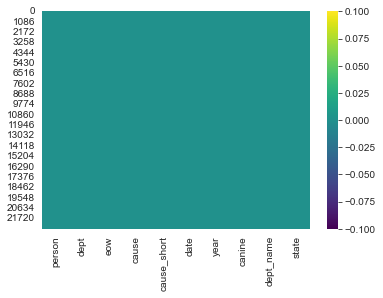

In [276]:
sns.heatmap(death_police.isnull(), cmap = 'viridis')

to simplify this analysis, I am going to reference this dataset with variable <strong>df</strong> for now; this variable name will be reassigned to other datasets later on

In [277]:
df = death_police.copy(deep = True);

In [278]:
for i in df.columns:
    print('Column', i, ': \n', df[i].value_counts(), '\n');

Column person : 
 K9 Rocky                                4
K9 King                                 3
K9 Bruno                                3
K9 Sarge                                3
K9 Roscoe                               3
                                       ..
Game Warden Harvey M. Carter            1
Detective Sergeant John F. Mickley      1
Deputy Game Warden John W. Hollowell    1
Deputy Game Warden Joseph Saunders      1
K9 Credo                                1
Name: person, Length: 22742, dtype: int64 

Column dept : 
 New York City Police Department, NY                                         753
Chicago Police Department, IL                                               492
Puerto Rico Police Department, PR                                           338
United States Department of Justice - United States Marshals Service, US    279
Philadelphia Police Department, PA                                          256
                                                            

In [279]:
for i in df.columns:
    print('Column', i, ': \n', df[i].nunique(), '\n');

Column person : 
 22742 

Column dept : 
 6528 

Column eow : 
 17158 

Column cause : 
 36 

Column cause_short : 
 36 

Column date : 
 17158 

Column year : 
 202 

Column canine : 
 2 

Column dept_name : 
 5525 

Column state : 
 60 



In [280]:
death_police_post_EDA = df.copy(deep = True);

### For dataset 2: Police Killings, Dataframe_name: death_pol_killings

Similar to earlier, I am going to reference the death_pol_killings dataframe as <strong>df</strong> here temporarily for the sake of simplicity.

In [281]:
df = death_pol_killings.copy(deep = True);

In [282]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-co

In [283]:
df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
8422    Suburban
8423       Urban
8424       Urban
8425       Urban
8426    Suburban
Name: Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ), Length: 8427, dtype: object

<AxesSubplot:>

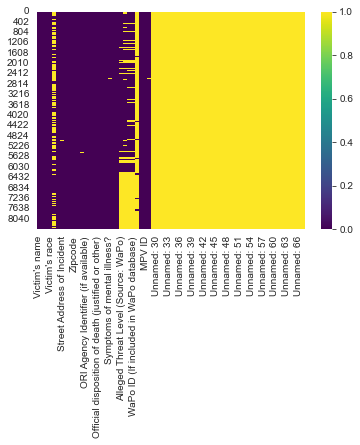

In [284]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [285]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).columns

Index(['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'],
      dtype='object')

<AxesSubplot:>

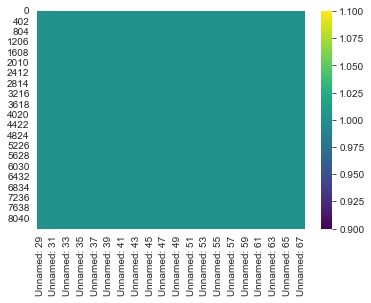

In [286]:
sns.heatmap(df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).isnull(), cmap = 'viridis')

In [287]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).isnull().sum()

Unnamed: 29    8427
Unnamed: 30    8427
Unnamed: 31    8427
Unnamed: 32    8427
Unnamed: 33    8427
Unnamed: 34    8427
Unnamed: 35    8427
Unnamed: 36    8427
Unnamed: 37    8427
Unnamed: 38    8427
Unnamed: 39    8427
Unnamed: 40    8427
Unnamed: 41    8427
Unnamed: 42    8427
Unnamed: 43    8427
Unnamed: 44    8427
Unnamed: 45    8427
Unnamed: 46    8427
Unnamed: 47    8427
Unnamed: 48    8427
Unnamed: 49    8427
Unnamed: 50    8427
Unnamed: 51    8427
Unnamed: 52    8427
Unnamed: 53    8427
Unnamed: 54    8427
Unnamed: 55    8427
Unnamed: 56    8427
Unnamed: 57    8427
Unnamed: 58    8427
Unnamed: 59    8427
Unnamed: 60    8427
Unnamed: 61    8427
Unnamed: 62    8427
Unnamed: 63    8427
Unnamed: 64    8427
Unnamed: 65    8427
Unnamed: 66    8427
Unnamed: 67    8427
dtype: int64

In [288]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).columns

Index(['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'],
      dtype='object')

In [289]:
df.drop(columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True);

In [290]:
print(death_pol_killings.columns)
'''
death_pol_killings.drop (columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True)
       '''

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-co

"\ndeath_pol_killings.drop (columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',\n       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',\n       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',\n       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',\n       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',\n       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',\n       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',\n       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',\n       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',\n       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True)\n       "

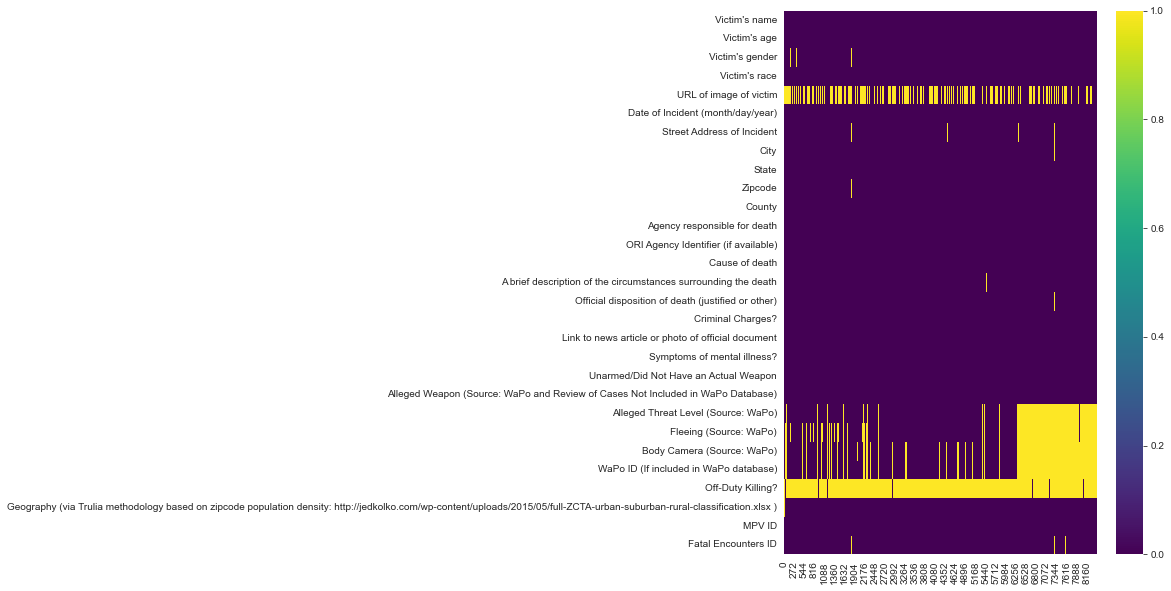

In [291]:
plt.figure(figsize = (7, 10));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [292]:
for i in df.columns:
    print('Column', i, 'null Values: \n', df[i].isnull().sum(), '\n');

Column Victim's name null Values: 
 0 

Column Victim's age null Values: 
 0 

Column Victim's gender null Values: 
 12 

Column Victim's race null Values: 
 0 

Column URL of image of victim null Values: 
 3888 

Column Date of Incident (month/day/year) null Values: 
 0 

Column Street Address of Incident null Values: 
 87 

Column City null Values: 
 6 

Column State null Values: 
 0 

Column Zipcode null Values: 
 36 

Column County null Values: 
 14 

Column Agency responsible for death null Values: 
 15 

Column ORI Agency Identifier (if available) null Values: 
 1 

Column Cause of death null Values: 
 0 

Column A brief description of the circumstances surrounding the death null Values: 
 17 

Column Official disposition of death (justified or other) null Values: 
 11 

Column Criminal Charges? null Values: 
 0 

Column Link to news article or photo of official document null Values: 
 11 

Column Symptoms of mental illness? null Values: 
 9 

Column Unarmed/Did Not Have an Actua

In [293]:
for i in df.columns:
    print('Column', i, ': \n', df[i].value_counts(), '\n');

Column Victim's name : 
 Name withheld by police    258
Michael Brown                3
Robert Edwards               3
Christopher Anderson         2
Andrew Thomas                2
                          ... 
Benjamin Gregware            1
Mark Daniels                 1
Raymond Bishop               1
Ronell Foster                1
Andrew Layton                1
Name: Victim's name, Length: 8129, dtype: int64 

Column Victim's age : 
 25         278
31         273
Unknown    271
28         264
32         264
          ... 
10           1
95           1
93           1
7            1
107          1
Name: Victim's age, Length: 87, dtype: int64 

Column Victim's gender : 
 Male           7981
Female          421
Transgender       9
Unknown           4
Name: Victim's gender, dtype: int64 

Column Victim's race : 
 White               3711
Black               2121
Hispanic            1456
Unknown race         845
Asian                130
Native American      118
Pacific Islander      46
Nam

<strong>NOTE:</strong> 
- mental illness column: has 3 different values for 'unknown' due to case sensitivity and typos
- Off-Duty Killing? column: 3 values for off-duty due to case sensitivity

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



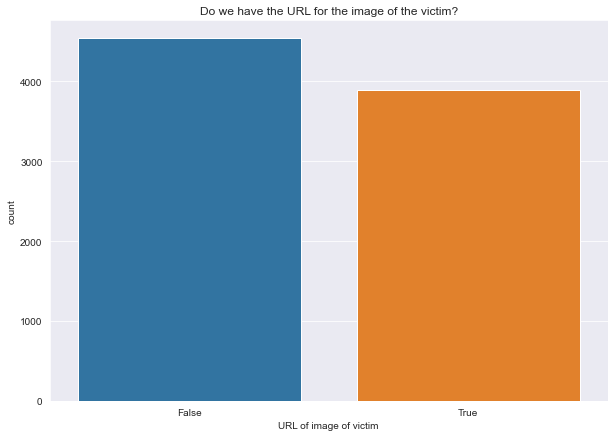

In [294]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['URL of image of victim'].isnull());
plt.title('Do we have the URL for the image of the victim?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



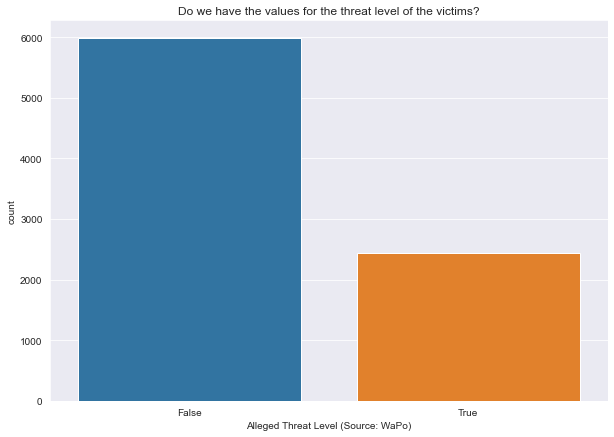

In [295]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['Alleged Threat Level (Source: WaPo)'].isnull());
plt.title('Do we have the values for the threat level of the victims?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



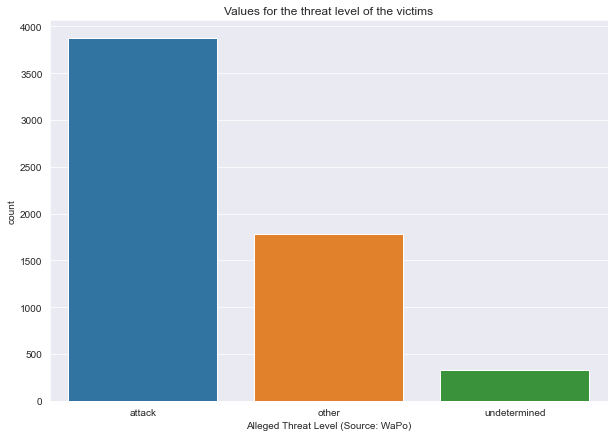

In [296]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['Alleged Threat Level (Source: WaPo)']);
plt.title('Values for the threat level of the victims');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



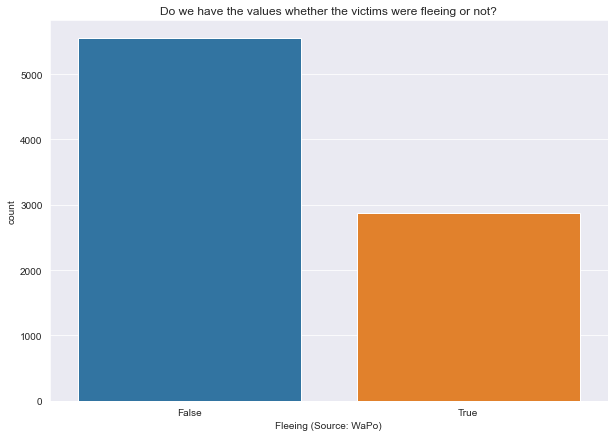

In [297]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['Fleeing (Source: WaPo)'].isnull());
plt.title('Do we have the values whether the victims were fleeing or not?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



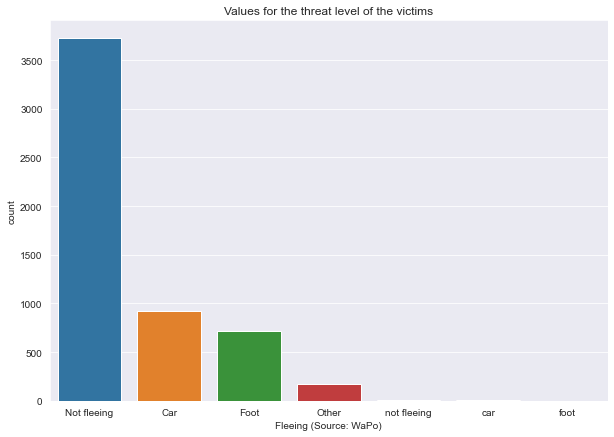

In [298]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Fleeing (Source: WaPo)']);
plt.title('Values for the threat level of the victims');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



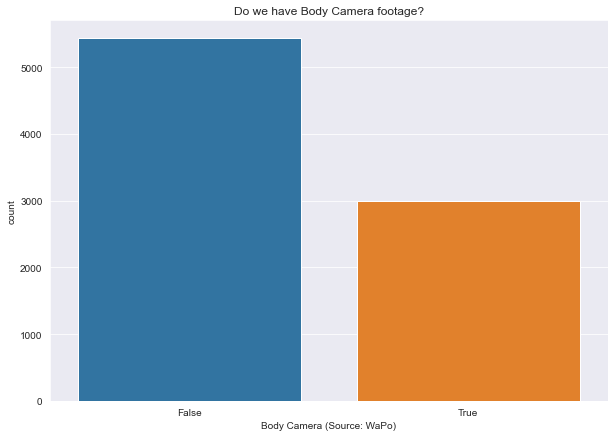

In [299]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Body Camera (Source: WaPo)'].isnull());
plt.title('Do we have Body Camera footage?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



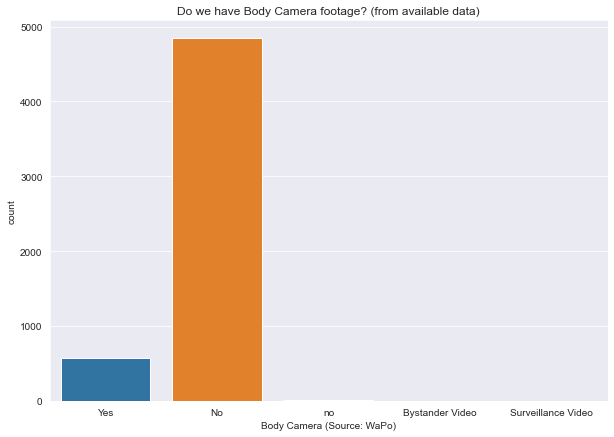

In [300]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Body Camera (Source: WaPo)']);
plt.title('Do we have Body Camera footage? (from available data)');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



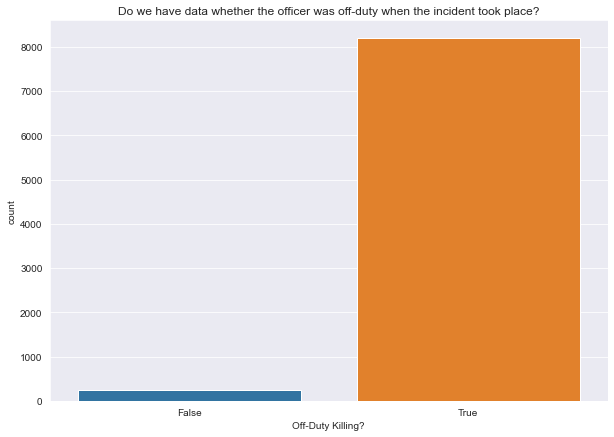

In [301]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Off-Duty Killing?'].isnull());
plt.title('Do we have data whether the officer was off-duty when the incident took place?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



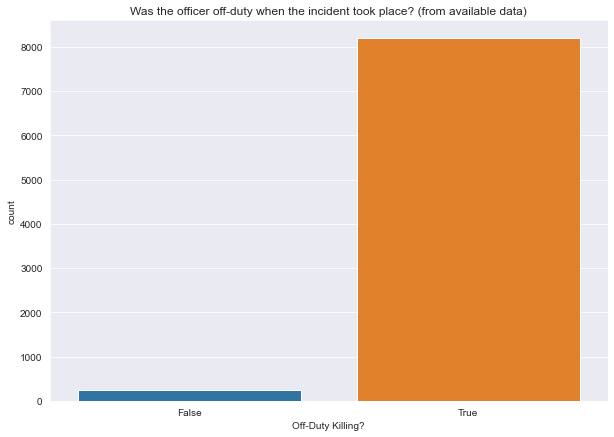

In [302]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Off-Duty Killing?'].isnull());
plt.title('Was the officer off-duty when the incident took place? (from available data)');

In [303]:
# storing values in case they were changed
death_pol_killings_post_EDA = df.copy(deep = True); 

### For dataset 3: Deaths while arresting , Dataframe_name: death_arrests

In [304]:
# assigning df to this dataframe to avoid redundacy of code and minimize time spent typing
df = death_arrests.copy(deep = True);

In [305]:
df.columns

Index(['State', 'City', 'PD',
       'Black People Killed by Police (1/1/2013-12/31/2019)',
       'Hispanic People Killed by Police (1/1/2013-12/31/2019)',
       'Native American People Killed by Police (1/1/2013-12/31/2019)',
       'Asian People Killed by Police (1/1/2013-12/31/2019)',
       'Pacific Islanders Killed by Police (1/1/2013-12/31/2019)',
       'White People Killed by Police (1/1/2013-12/31/2019)',
       'Unknown Race People Killed by Police (1/1/2013-12/31/2019)',
       'All People Killed by Police (1/1/2013-12/31/2019)', 'Total', 'Black',
       'White', 'Amer. Indian', 'Asian', 'Hawaiian', 'Asian/Pacific Islander',
       'Other', 'Two or\nmore races', 'Hispanic',
       'Black-White Dissimilarity Index (2010)',
       'Murder and\nnonnegligent manslaughter', 'Murder Rate',
       'Avg Annual Police Homicide Rate',
       'Avg Annual Police Homicide Rate for Black People',
       'Avg Annual Police Homicide Rate for White People',
       'Avg Annual Police Homici

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 46 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          102 non-null    object 
 1   City                                                           103 non-null    object 
 2   PD                                                             102 non-null    object 
 3   Black People Killed by Police (1/1/2013-12/31/2019)            93 non-null     float64
 4   Hispanic People Killed by Police (1/1/2013-12/31/2019)         71 non-null     float64
 5   Native American People Killed by Police (1/1/2013-12/31/2019)  12 non-null     float64
 6   Asian People Killed by Police (1/1/2013-12/31/2019)            33 non-null     float64
 7   Pacific Islanders Killed by Police (1/1/2013-12/31/2019)    

In [307]:
df.describe()

,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),All People Killed by Police (1/1/2013-12/31/2019),Black-White Dissimilarity Index (2010),Murder Rate,...,Violent crimes 2018 (if reported by agency),Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Killings by Police per 10k Arrests
count,93.000000,71.000000,12.000000,33.000000,9.000000,91.000000,50.000000,102.000000,100.00000,102.000000,...,97.000000,101.000000,101.000000,90.000000,92.000000,89.000000,92.000000,93.000000,95.000000,97.000000
mean,37.365591,31.915493,12.416667,6.424242,8.222222,49.153846,18.100000,113.274510,47.76680,13.638235,...,9898.288660,9348.536634,7.634653,27957.544444,25761.358696,23460.112360,22174.391304,21038.204301,20181.936842,10.827835
std,215.977444,166.629850,31.445359,21.824628,13.772961,361.190991,91.754831,775.775807,16.05875,18.787125,...,48695.427594,46419.666991,4.098669,44370.996328,42520.616931,37502.979738,34130.809754,31475.686249,27941.657750,6.626945
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,17.24000,0.000000,...,160.000000,143.000000,0.700000,2742.000000,2500.000000,2566.000000,2422.000000,2405.000000,2064.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.000000,34.61500,3.400000,...,1636.000000,1539.000000,4.500000,9634.500000,9020.000000,8954.000000,9106.500000,7925.000000,7836.500000,6.700000
50%,5.000000,3.000000,2.000000,1.000000,1.000000,4.000000,2.000000,13.000000,49.84000,6.600000,...,2953.000000,2754.600000,7.100000,17526.000000,16247.500000,15019.000000,13816.500000,13247.000000,13303.000000,9.500000
75%,10.000000,8.500000,3.250000,2.000000,10.000000,9.000000,4.000000,24.750000,58.69000,15.725000,...,5480.000000,5335.300000,10.100000,30561.250000,27520.500000,25723.000000,24121.250000,23632.000000,21461.500000,13.000000
max,1957.000000,1338.000000,111.000000,120.000000,42.000000,3417.000000,641.000000,7626.000000,82.48000,104.100000,...,480067.000000,466620.500000,18.900000,393809.000000,387727.000000,339470.000000,314864.000000,286225.000000,246773.000000,39.700000


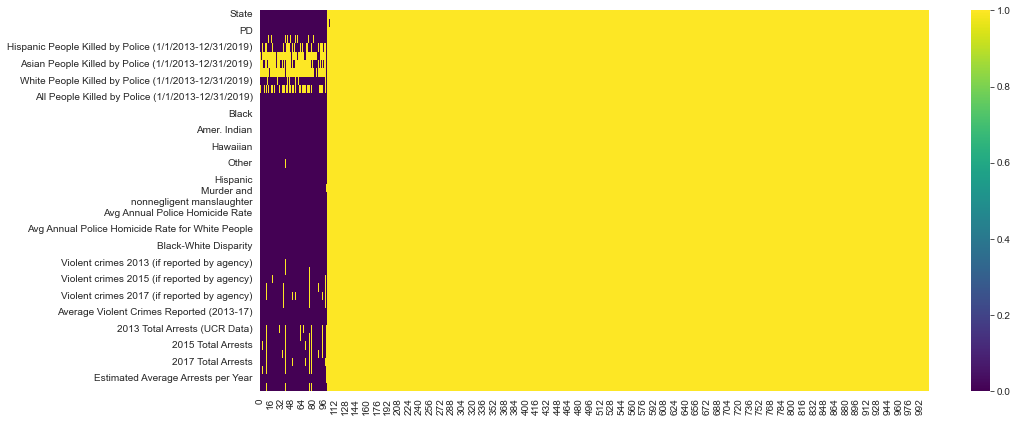

In [308]:
plt.figure(figsize = (15, 7));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [309]:
df.isnull().sum()

State                                                            904
City                                                             903
PD                                                               904
Black People Killed by Police (1/1/2013-12/31/2019)              913
Hispanic People Killed by Police (1/1/2013-12/31/2019)           935
Native American People Killed by Police (1/1/2013-12/31/2019)    994
Asian People Killed by Police (1/1/2013-12/31/2019)              973
Pacific Islanders Killed by Police (1/1/2013-12/31/2019)         997
White People Killed by Police (1/1/2013-12/31/2019)              915
Unknown Race People Killed by Police (1/1/2013-12/31/2019)       956
All People Killed by Police (1/1/2013-12/31/2019)                904
Total                                                            904
Black                                                            904
White                                                            904
Amer. Indian                      

In [310]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].value_counts(), '\n');

Column:  State
California              17
Texas                   13
Florida                  6
Arizona                  6
North Carolina           5
Nevada                   4
Ohio                     4
Virginia                 3
New York                 3
Colorado                 3
Nebraska                 2
Wisconsin                2
Tennessee                2
Oklahoma                 2
Kentucky                 2
Pennsylvania             2
Missouri                 2
New Jersey               2
Washington               2
Indiana                  2
United States            2
Louisiana                2
Hawaii                   1
Michigan                 1
District of Columbia     1
Illinois                 1
Massachusetts            1
Alabama                  1
Minneapolis              1
Maryland                 1
Georgia                  1
Oregon                   1
Alaska                   1
Minnesota                1
Kansas                   1
New Mexico               1
Name: State, 

In [311]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].nunique());
    print(df[x].unique(), '\n');

Column:  State
36
['New Mexico' 'California' 'Alaska' 'Texas' 'Georgia' 'Colorado'
 'Maryland' 'Louisiana' 'Alabama' 'Massachusetts' 'New York' 'Arizona'
 'North Carolina' 'Virginia' 'Illinois' 'Ohio' 'District of Columbia'
 'Michigan' 'Indiana' 'Nevada' 'Florida' 'Hawaii' 'New Jersey' 'Missouri'
 'Kentucky' 'Nebraska' 'Wisconsin' 'Tennessee' 'Minneapolis' 'Oklahoma'
 'Pennsylvania' 'Oregon' 'Washington' 'Minnesota' 'Kansas' 'United States'
 nan] 

Column:  City
103
['Albuquerque' 'Anaheim' 'Anchorage' 'Arlington' 'Atlanta' 'Aurora'
 'Austin' 'Bakersfield' 'Baltimore' 'Baton Rouge' 'Birmingham' 'Boston'
 'Buffalo' 'Chandler' 'Charlotte' 'Chesapeake' 'Chicago' 'Chula Vista'
 'Cincinnati' 'Cleveland' 'Colorado Springs' 'Columbus' 'Corpus Christi'
 'Dallas' 'Washington' 'Denver' 'Detroit' 'Durham' 'El Paso' 'Fort Wayne'
 'Fort Worth' 'Fremont' 'Fresno' 'Garland' 'Glendale' 'Greensboro'
 'Henderson' 'Hialeah' 'Honolulu' 'Houston' 'Indianapolis' 'Irvine'
 'Irving' 'Jacksonville' 'Jersey Cit

<strong>NOTE: </strong> There are a lot of missing values in this dataframe. Will need to keep this in mind while data wrangling/imputation

In [312]:
death_arrests_post_EDA = df.copy(deep = True);

### For dataset 4: Fatal Encounters, Dataframe_name: fatal_enc

In [313]:
# assigning df to this dataframe to avoid redundacy of code and minimize time spent typing
df = fatal_enc.copy(deep = True);

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28622 entries, 0 to 28621
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unique ID                                                       28621 non-null  float64
 1   Subject's name                                                  28622 non-null  object 
 2   Subject's age                                                   27608 non-null  object 
 3   Subject's gender                                                28521 non-null  object 
 4   Subject's race                                                  28621 non-null  object 
 5   Subject's race with imputations                                 28448 non-null  object 
 6   Imputation probability                                          28439 non-null  object 
 7   URL of image of deceased                         

In [315]:
df.describe()

,Unique ID,Location of death (zip code),Latitude,Longitude,Unique ID formula,Unique identifier (redundant),Date (Year)
count,28621.000000,28432.000000,28621.000000,28621.000000,2.000000,28621.000000,28622.000000
mean,14311.000000,58432.535488,36.767127,-95.441638,28059.000000,14311.000000,2011.190972
std,8262.315364,27982.930895,5.160217,16.339723,794.788022,8262.315364,5.837947
min,1.000000,1013.000000,19.034681,-165.591880,27497.000000,1.000000,2000.000000
25%,7156.000000,33159.250000,33.542220,-111.278099,27778.000000,7156.000000,2006.000000
50%,14311.000000,60660.500000,36.692833,-90.556579,28059.000000,14311.000000,2012.000000
75%,21466.000000,85044.000000,40.426677,-82.576535,28340.000000,21466.000000,2016.000000
max,28621.000000,99921.000000,71.301250,-67.266033,28621.000000,28621.000000,2100.000000


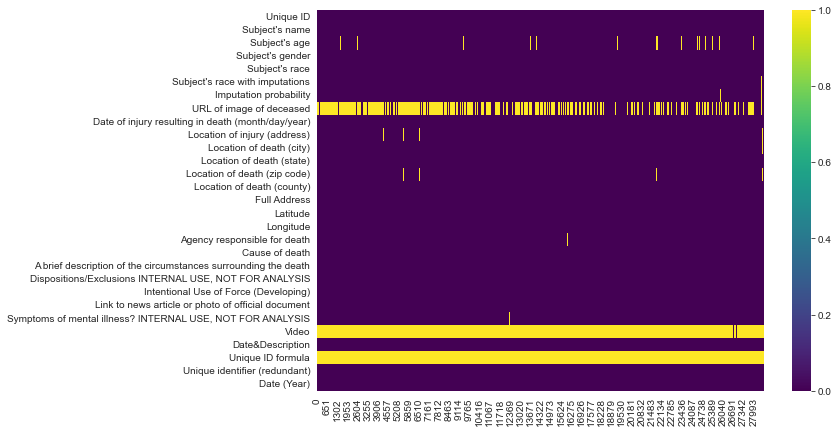

In [316]:
plt.figure(figsize = (10, 7));
sns.heatmap (df.isnull().transpose(), cmap = 'viridis');

In [317]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].value_counts(), '\n');

Column:  Unique ID
25746.0    1
15940.0    1
15951.0    1
15950.0    1
15949.0    1
          ..
7594.0     1
7593.0     1
7592.0     1
7591.0     1
28621.0    1
Name: Unique ID, Length: 28621, dtype: int64 

Column:  Subject's name
Name withheld by police                       1173
Michael Johnson                                  7
John Doe 2                                       4
William Smith                                    4
Michael Moore                                    4
                                              ... 
Nathan Paul Sanderson                            1
Shawn Matthew Roe                                1
Leroy Henderson                                  1
Dane Johnson                                     1
This is a spacer for Fatal Encounters use.       1
Name: Subject's name, Length: 27219, dtype: int64 

Column:  Subject's age
22           920
25           896
24           864
27           851
23           849
            ... 
8 months       1
18 months   

In [318]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].nunique());
    print(df[x].unique(), '\n');

Column:  Unique ID
28621
[25746. 25747. 25748. ... 28616. 28621.    nan] 

Column:  Subject's name
27219
['Samuel H. Knapp' 'Mark A. Horton' 'Phillip A. Blurbridge' ... 'Reuben'
 'Danny Ray Spence' 'This is a spacer for Fatal Encounters use.'] 

Column:  Subject's age
118
['17' '21' '19' '23' '24' '53' '30' '29' '55' '42' '41' '45' '20' '25'
 '22' '31' '36' '28' '35' nan '26' '68' '16' '49' '27' '50' '44' '43' '38'
 '34' '32' '14' '15' '18' '33' '57' '1' '88' '37' '40' '85' '48' '56' '52'
 '46' '63' '74' '60' '59' '51' '69' '10' '13' '39' '47' '66' '79' '12'
 '11' '54' '65' '75' '20s' '6' '7' '5' '3' '72' '58' '71' '80' '78' '61'
 '73' '67' '70' '77' '76' '8' '9' '64' '62' '4' '83' '2' '89' '60s'
 '18-25' '18 months' '46/53' '3 months' '40s' '30s' '84' '90' '50s' '81'
 '87' '6 months' '9 months' '10 months' '86' '92' '2 months' '7 months'
 '82' '8 months' '91' '3 days' '55.' '20s-30s' '95' '101' '107' '40-50'
 '97' '93' '4 months' '70s'] 

Column:  Subject's gender
3
['Male' 'Female' n

In [319]:
fatal_enc_post_EDA = df.copy(deep = True);

<strong>NOTE: </strong> This is the largest dataset we have in all of this

### For dataset 5: Washington Post Data, Dataframe_name: wash_post_shoot_stats

In [320]:
# assigning df to this dataframe to avoid redundacy of code and minimize time spent typing
df = wash_post_shoot_stats.copy(deep = True);

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5552 non-null   int64  
 1   name                     5552 non-null   object 
 2   date                     5552 non-null   object 
 3   manner_of_death          5552 non-null   object 
 4   armed                    5339 non-null   object 
 5   age                      5307 non-null   float64
 6   gender                   5551 non-null   object 
 7   race                     4966 non-null   object 
 8   city                     5552 non-null   object 
 9   state                    5552 non-null   object 
 10  signs_of_mental_illness  5552 non-null   bool   
 11  threat_level             5552 non-null   object 
 12  flee                     5290 non-null   object 
 13  body_camera              5552 non-null   bool   
dtypes: bool(2), float64(1), 

In [322]:
df.describe()

,id,age
count,5552.000000,5307.000000
mean,3084.888689,37.121726
std,1739.209618,13.112530
min,3.000000,6.000000
25%,1581.750000,27.000000
50%,3087.500000,35.000000
75%,4603.250000,46.000000
max,6075.000000,91.000000


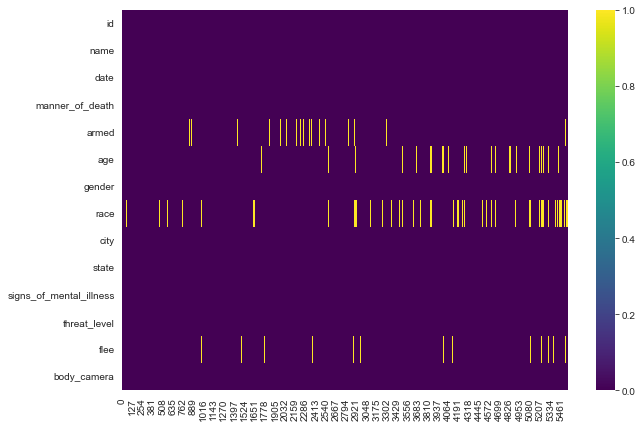

In [323]:
plt.figure(figsize = (10, 7));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [324]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].value_counts(), '\n');

Column:  id
3       1
4065    1
4060    1
4059    1
4067    1
       ..
2062    1
2055    1
2053    1
2058    1
6045    1
Name: id, Length: 5552, dtype: int64 

Column:  name
TK TK                    200
Michael Johnson            3
Robert Martinez            2
Brandon Jones              2
David Willoughby           2
                        ... 
Jun Wang                   1
Jason King                 1
Jay Johannes Holmgren      1
Edwin Amaya Maldonado      1
Jeffrey Hubbard            1
Name: name, Length: 5337, dtype: int64 

Column:  date
2018-02-01    9
2018-06-29    9
2018-04-01    9
2018-01-06    9
2020-05-26    9
             ..
2016-07-20    1
2017-11-20    1
2016-07-22    1
2019-09-22    1
2017-10-18    1
Name: date, Length: 1902, dtype: int64 

Column:  manner_of_death
shot                5275
shot and Tasered     277
Name: manner_of_death, dtype: int64 

Column:  armed
gun                        3146
knife                       818
unarmed                     355
toy weapon

In [325]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].nunique());
    print(df[x].unique(), '\n');

Column:  id
5552
[   3    4    5 ... 6043 6044 6045] 

Column:  name
5337
['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ... 'Thomas Moles'
 'Jose Manuel Castro' 'Jeffrey Hubbard'] 

Column:  date
1902
['2015-01-02' '2015-01-03' '2015-01-04' ... '2020-08-14' '2020-08-15'
 '2020-08-16'] 

Column:  manner_of_death
2
['shot' 'shot and Tasered'] 

Column:  armed
94
['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'metal pole' 'Taser'
 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' 'carjack' 'chain' "contractor's level"
 'unknown weapon' 'stapler' 'beer bottle' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'scissors' 'pole' 'pick-axe'

In [326]:
wash_post_shoot_stats_post_EDA = df.copy(deep =True);

<strong>Note: </strong>Most complete dataset we have here.

## Data Wrangling/Imputations and notes

### For dataset 1: Police deaths. Dataframe_name: death_police 

In [327]:
# for the sake of simplicity, assigning the post_EDA dataframe to 'df'
df = death_police_post_EDA.copy(deep=True);

<AxesSubplot:>

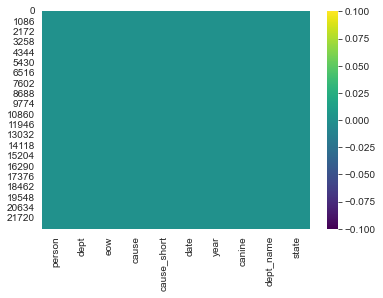

In [328]:
sns.heatmap(df.isnull(), cmap = 'viridis')

It is very interesting to note that despite being such a huge dataset, we have no values that are null here. It may be indicative of how no stone was left unturned in investigating and documenting the death of state agents. It could also stem from the close proximity of the state agents to homicidal data collection agencies, departments and institutions. This would result in an ease of solving and logging incidents of this nature for record keeping by the government

In [329]:
df['person'].value_counts()

K9 Rocky                                4
K9 King                                 3
K9 Bruno                                3
K9 Sarge                                3
K9 Roscoe                               3
                                       ..
Game Warden Harvey M. Carter            1
Detective Sergeant John F. Mickley      1
Deputy Game Warden John W. Hollowell    1
Deputy Game Warden Joseph Saunders      1
K9 Credo                                1
Name: person, Length: 22742, dtype: int64

In [330]:
df[df['person'].apply(lambda x: x.split(' ')[0]) == 'K9']

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
12736,K9 Baron,"Virginia State Police, VA","EOW: Wednesday, September 12, 1962",Cause of Death: Assault,Assault,1962-09-12,1962,True,Virginia State Police,VA
13332,K9 Apache,"Chattanooga Police Department, TN","EOW: Tuesday, March 29, 1966",Cause of Death: Automobile accident,Automobile accident,1966-03-29,1966,True,Chattanooga Police Department,TN
14644,K9 King,"Augusta County Sheriff's Office, VA","EOW: Saturday, June 3, 1972",Cause of Death: Gunfire,Gunfire,1972-06-03,1972,True,Augusta County Sheriff's Office,VA
15202,K9 Woo,"Tucson Police Department, AZ","EOW: Saturday, November 23, 1974",Cause of Death: Struck by vehicle,Struck by vehicle,1974-11-23,1974,True,Tucson Police Department,AZ
15448,K9 Fritz,"Pittsburgh Police Department, PA","EOW: Monday, April 28, 1975",Cause of Death: Fall,Fall,1975-04-28,1975,True,Pittsburgh Police Department,PA
...,...,...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Cause of Death: Accidental,Accidental,2016-06-12,2016,True,Amarillo Police Department,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-20,2016,True,United States Department of Homeland Security ...,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-27,2016,True,Fountain County Sheriff's Office,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Cause of Death: Gunfire (Accidental),Gunfire (Accidental),2016-06-28,2016,True,Long Beach Police Department,CA


In [331]:
df[df['person'].apply(lambda x: x.split(' ')[0]) == 'K9']['cause_short'].value_counts()

Gunfire                 82
Heat exhaustion         47
Struck by vehicle       35
Stabbed                 18
Fall                    14
Automobile accident     14
Gunfire (Accidental)    11
Vehicular assault        6
Drowned                  6
Assault                  5
Duty related illness     5
Animal related           5
Training accident        3
Accidental               2
Asphyxiation             2
Exposure to toxins       2
Poisoned                 2
Fire                     2
Terrorist attack         1
Unidentified             1
Struck by train          1
Name: cause_short, dtype: int64

In [332]:
df[df['person'].apply(lambda x: x.split(' ')[0]) != 'K9']

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
...,...,...,...,...,...,...,...,...,...,...
22772,Sergeant Stacey Allen Baumgartner,"Patton Village Police Department, TX","EOW: Sunday, June 19, 2016",Cause of Death: Vehicle pursuit,Vehicle pursuit,2016-06-19,2016,False,Patton Village Police Department,TX
22773,"Deputy Sheriff David Francis Michel, Jr.","Jefferson Parish Sheriff's Office, LA","EOW: Wednesday, June 22, 2016",Cause of Death: Gunfire,Gunfire,2016-06-22,2016,False,Jefferson Parish Sheriff's Office,LA
22774,Officer Bradley Wayne Treat,United States Department of Agriculture - Fore...,"EOW: Wednesday, June 29, 2016",Cause of Death: Animal related,Animal related,2016-06-29,2016,False,United States Department of Agriculture - Fore...,US
22775,"Deputy Sheriff Martin Tase Sturgill, II","Humphreys County Sheriff's Office, TN","EOW: Thursday, June 30, 2016",Cause of Death: Heart attack,Heart attack,2016-06-30,2016,False,Humphreys County Sheriff's Office,TN


In [333]:
df[df['person'].apply(lambda x: x.split(' ')[0]) != 'K9']['cause_short'].value_counts()

Gunfire                     11985
Automobile accident          2334
Motorcycle accident          1134
Heart attack                  977
Vehicular assault             882
Struck by vehicle             833
Vehicle pursuit               627
Assault                       608
Gunfire (Accidental)          593
Stabbed                       447
Aircraft accident             381
Drowned                       256
Struck by train               253
Fall                          183
Duty related illness          164
9/11 related illness          110
Terrorist attack               84
Electrocuted                   83
Accidental                     78
Animal related                 77
Struck by streetcar            68
Fire                           61
Explosion                      58
Bomb                           57
Exposure to toxins             42
Weather/Natural disaster       33
Training accident              25
Structure collapse             23
Train accident                 18
Exposure      

### For dataset 2: Police Killings, Dataframe_name: death_pol_killings

In [334]:
df = death_pol_killings_post_EDA.copy(deep = True);

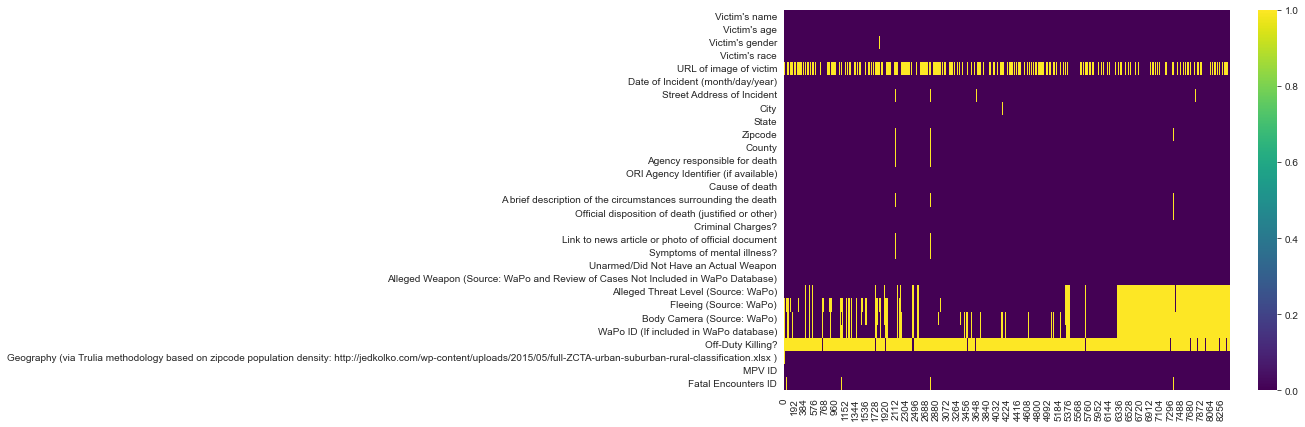

In [335]:
plt.figure(figsize = (10, 7));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [336]:
df['Victim\'s name'].value_counts()

Name withheld by police    258
Michael Brown                3
Robert Edwards               3
Christopher Anderson         2
Andrew Thomas                2
                          ... 
Benjamin Gregware            1
Mark Daniels                 1
Raymond Bishop               1
Ronell Foster                1
Andrew Layton                1
Name: Victim's name, Length: 8129, dtype: int64

In [337]:
df[df['Victim\'s age'] == 'Unknown']

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,Unknown,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8448,28737.0
1,Name withheld by police,Unknown,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8446,28734.0
8,Name withheld by police,Unknown,Male,Unknown race,NaN,03/09/2020,CA-14 and Redrock Randsburg Rd,Bakersfield,CA,93519.0,...,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,8443,28725.0
19,Kurt Phelps,Unknown,Male,Unknown race,NaN,29/08/2020,1200 M 3/4 Road,Loma,CO,81524.0,...,Allegedly Armed,gun,other,Not fleeing,No,6118.0,NaN,Rural,8430,28697.0
29,Name withheld by police,Unknown,NaN,Unknown race,NaN,24/08/2020,Florence and Beverly Hills Ave NE,Albuquerque,NM,87113.0,...,Allegedly Armed,gun,attack,NaN,No,6109.0,NaN,Urban,8420,28657.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,Name withheld by police,Unknown,Male,Unknown race,NaN,22/05/2013,5600 Wyalusing Avenue,Philadelphia,PA,19131.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,426,12824.0
8056,Name withheld by police,Unknown,Male,Unknown race,NaN,08/05/2013,N.W. 59 Street & N.W. 35 Avenue,Miami,FL,33142.0,...,Unclear,undetermined,NaN,NaN,NaN,NaN,NaN,Urban,378,12757.0
8065,Name withheld by police,Unknown,Male,Unknown race,NaN,04/05/2013,Northwest 114th Street and 27th Avenue,Miami,FL,33167.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,367,12743.0
8114,Michael Everett Morgan,Unknown,Male,Unknown race,NaN,22/04/2013,1170 W. State Road 434,Longwood,FL,32750.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,317,12681.0


In [338]:
df['Victim\'s age'].unique()

array(['Unknown', '61', '22', '33', '38', '48', '53', '18', '50', '58',
       '36', '29', '26', '25', '43', '44', '17', '30', '31', '41', '47',
       '39', '35', '42', '37', '21', '60', '27', '34', '32', '52', '28',
       '40', '45', '51', '55', '67', '63', '56', '73', '49', '24', '59',
       '23', '20', '62', '70', '57', '68', '19', '81', '65', '46', '69',
       '64', '54', '16', '66', '82', '83', '75', '15', '76', '74', '77',
       '80', '14', '71', '6', '78', '72', '84', '89', '1', '40s', '79',
       '91', '13', '86', '10', '12', '95', '5', '93', '7', '107', '87'],
      dtype=object)

Since a we have some non-null unknown values, I shall first of all cast them as null, then convert the age values into integer/numerical values and then replace them with the mean value if there aren't a lot of outliers, or the standard deviation if there are a lot of outliers

In [339]:
df['Victim\'s age'].replace(to_replace= 'Unknown', value = np.NAN, inplace = True);

In [340]:
df['Victim\'s age'].dropna().value_counts().index

Index(['25', '31', '28', '32', '27', '34', '33', '30', '26', '35', '29', '24',
       '37', '36', '23', '22', '38', '21', '39', '40', '41', '42', '43', '45',
       '20', '49', '44', '47', '50', '18', '19', '46', '48', '51', '52', '53',
       '54', '55', '56', '59', '17', '57', '58', '61', '62', '60', '16', '63',
       '64', '65', '67', '66', '68', '69', '70', '15', '73', '71', '76', '72',
       '74', '75', '78', '14', '83', '84', '77', '80', '86', '6', '82', '81',
       '5', '1', '13', '12', '87', '89', '79', '10', '40s', '95', '93', '7',
       '107', '91'],
      dtype='object')

In [357]:
df['Victim\'s age'].replace(to_replace= '40s', value = '45', inplace = True);

In [360]:
def age_bar_filter(x):
    if np.isnan(x):
        return x;
    else:
        return int(x);

In [361]:
#df['Victim\'s age'] = df['Victim\'s age'].apply(lambda x: x if np.isnull(x) else int(x));
df['Victim\'s age'].apply(lambda x: age_bar_filter(x));

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [256]:
df['Victim\'s age'].describe()

count    8156.000000
mean       36.828347
std        13.145415
min         1.000000
25%        27.000000
50%        35.000000
75%        45.000000
max       107.000000
Name: Victim's age, dtype: float64

In [220]:
df[df["Victim\'s gender"].isnull()]

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
29,Name withheld by police,Unknown,NaN,Unknown race,NaN,24/08/2020,Florence and Beverly Hills Ave NE,Albuquerque,NM,87113.0,...,Allegedly Armed,gun,attack,NaN,No,6109.0,NaN,Urban,8420,28657.0
173,Name withheld by police,Unknown,NaN,Unknown race,NaN,05/07/2020,2700 S Reservoir St,Chino,CA,91766.0,...,Unclear,undetermined,undetermined,NaN,No,5968.0,NaN,Suburban,8277,28476.0
335,Roy Ogden,Unknown,NaN,Unknown race,NaN,15/05/2020,I-26 East Rest Area,Ladson,SC,29456.0,...,Allegedly Armed,gun,attack,Car,No,5829.0,NaN,Suburban,8112,28050.0
336,Name withheld by police,Unknown,NaN,Unknown race,NaN,15/05/2020,Bluff Springs Road,Eupora,MS,39744.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Rural,8114,28059.0
794,Name withheld by police,Unknown,NaN,Unknown race,NaN,29/12/2019,3015 Old State Rd 25,Lafayette,IN,47905.0,...,Allegedly Armed,gun,attack,not fleeing,no,5401.0,NaN,Urban,7652,27241.0
896,Name withheld by police,Unknown,NaN,White,NaN,29/11/2019,38300 Mountain Hwy E,Eatonville,WA,98328.0,...,Unclear,undetermined,undetermined,Car,No,5242.0,NaN,Rural,7552,27067.0
1309,Dennis Edwards,Unknown,NaN,White,NaN,10/07/2019,NaN,Kansas City,KS,NaN,...,Allegedly Armed,gun,attack,Not fleeing,No,4865.0,NaN,Undetermined,7135,NaN
1556,Akeen Brown,Unknown,NaN,Black,NaN,17/04/2019,NaN,Flint,MI,NaN,...,Allegedly Armed,gun,attack,Not fleeing,No,4642.0,NaN,Undetermined,6889,25919.0
1589,Name withheld by police,Unknown,NaN,Hispanic,NaN,06/04/2019,NM-9,Santa Teresa,NM,88021.0,...,Vehicle,vehicle,NaN,NaN,NaN,NaN,NaN,Rural,6857,26052.0
1590,Name withheld by police,Unknown,NaN,Hispanic,NaN,06/04/2019,NM-9,Santa Teresa,NM,88021.0,...,Vehicle,vehicle,NaN,NaN,NaN,NaN,NaN,Rural,6858,26053.0


In [ ]:
# since we have

### For dataset 3: Deaths while arresting , Dataframe_name: death_arrests

### For dataset 4: Fatal Encounters, Dataframe_name: fatal_enc

### For dataset 5: Washington Post Data, Dataframe_name: wash_post_shoot_stats